In [ ]:
import urllib.request
with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))

target.close()

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
!pip install pillow
from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import time 
for i in range(100):
  time.sleep(2)

In [ ]:
v_bias = tf.placeholder("float", [7])
h_bias = tf.placeholder("float", [2])

In [ ]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

In [ ]:
W

<tf.Tensor 'Const:0' shape=(7, 2) dtype=float32>

In [ ]:
sess = tf.Session()
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]])
v_state = X
print ("Input: ", sess.run(v_state))

h_bias = tf.constant([0.1, 0.1])
print ("hb: ", sess.run(h_bias))
print ("w: ", sess.run(W))

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias)  #probabilities of the hidden units
print ("p(h|v): ", sess.run(h_prob))

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random_uniform(tf.shape(h_prob)))) #states
print ("h0 states:", sess.run(h_state))

Input:  [[1. 0. 0. 1. 0. 0. 0.]]
hb:  [0.1 0.1]
w:  [[ 0.8484803  -0.17321126]
 [-0.45932633 -1.2371159 ]
 [-0.818947    0.28896198]
 [ 0.17592518 -1.2025214 ]
 [ 0.47691372 -0.4723026 ]
 [ 0.12630965 -2.5517485 ]
 [-0.8948597  -0.5185993 ]]
p(h|v):  [[0.75480497 0.21827748]]
h0 states: [[0. 0.]]


In [ ]:
h_prob

<tf.Tensor 'Sigmoid:0' shape=(1, 2) dtype=float32>

In [ ]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print ("b: ", sess.run(vb))
v_prob = sess.run(tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb))
print ("p(vi∣h): ", v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random_uniform(tf.shape(v_prob))))
print ("v probability states: ", sess.run(v_state))

b:  [0.1 0.2 0.1 0.1 0.1 0.2 0.1]
p(vi∣h):  [[0.5249792  0.549834   0.5249792  0.5249792  0.5249792  0.54983395
  0.5249792 ]]
v probability states:  [[0. 1. 1. 1. 1. 0. 1.]]


In [ ]:
X

<tf.Tensor 'Const_1:0' shape=(1, 7) dtype=float32>

In [ ]:
inp = sess.run(X)
print(inp)
print(v_prob[0])
v_probability = 1
for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)
v_probability

[[1. 0. 0. 1. 0. 0. 0.]]
[0.5249792  0.549834   0.5249792  0.5249792  0.5249792  0.54983395
 0.5249792 ]


0.005986424581851926

<h2>MNIST</h2>

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
# type(trX)
# type(trY)
# type(teX)
# type(teY)
print(trX.shape)
print(trY.shape)
print(teX.shape)
print(teY.shape)



(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [ ]:
vb = tf.placeholder("float", [784])
hb = tf.placeholder("float", [50])
# 50 node hidden

In [ ]:
W = tf.placeholder("float", [784, 50])
# multiply visible

In [ ]:
v0_state = tf.placeholder("float", [None, 784])
#visible layer orig

In [ ]:
h0_prob = tf.nn.sigmoid(tf.matmul(v0_state, W) + hb)  #probabilities of the hidden units
h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random_uniform(tf.shape(h0_prob)))) #sample_h_given_X

In [ ]:
v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random_uniform(tf.shape(v1_prob)))) #sample_v_given_h
#reconstructed

In [ ]:
h0_state

<tf.Tensor 'Relu_2:0' shape=(?, 50) dtype=float32>

In [ ]:
err = tf.reduce_mean(tf.square(v0_state - v1_state))

In [ ]:
h1_prob = tf.nn.sigmoid(tf.matmul(v1_state, W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random_uniform(tf.shape(h1_prob)))) #sample_h_given_X
alpha = 0.01
W_Delta = tf.matmul(tf.transpose(v0_state), h0_prob) - tf.matmul(tf.transpose(v1_state), h1_prob)
update_w = W + alpha * W_Delta
update_vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
update_hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)




In [ ]:
cur_w = np.zeros([784, 50], np.float32)
cur_vb = np.zeros([784], np.float32)
cur_hb = np.zeros([50], np.float32)
prv_w = np.zeros([784, 50], np.float32)
prv_vb = np.zeros([784], np.float32)
prv_hb = np.zeros([50], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
sess.run(err, feed_dict={v0_state: trX, W: prv_w, vb: prv_vb, hb: prv_hb})


0.48136258

Epoch: 0 reconstruction error: 0.089879
Epoch: 1 reconstruction error: 0.088481
Epoch: 2 reconstruction error: 0.087124
Epoch: 3 reconstruction error: 0.086404
Epoch: 4 reconstruction error: 0.085379
Epoch: 5 reconstruction error: 0.084911
Epoch: 6 reconstruction error: 0.085612
Epoch: 7 reconstruction error: 0.084502
Epoch: 8 reconstruction error: 0.084797


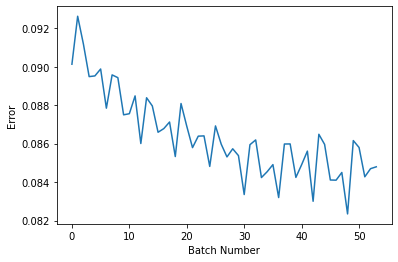

In [ ]:
#Parameters
epochs = 9
batchsize = 100
weights = []
errors = []

for epoch in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={ v0_state: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0_state: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={ v0_state: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict={v0_state: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
            weights.append(cur_w)
    print ('Epoch: %d' % epoch,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [ ]:
uw = weights[-1].T
print (uw) # a weight matrix of shape (50,784)

[[-0.35018033 -0.30250487 -0.28985    ... -0.27909622 -0.28927174
  -0.3089401 ]
 [-0.35025883 -0.30342585 -0.28997132 ... -0.2807828  -0.29018828
  -0.30979702]
 [-1.8164114  -1.7529963  -1.8032845  ... -1.845813   -1.6933239
  -1.7306635 ]
 ...
 [-0.8248992  -0.7929462  -0.77842355 ... -0.7521794  -0.7405053
  -0.7520382 ]
 [-1.5741543  -1.5562626  -1.531595   ... -1.5989878  -1.4707847
  -1.5601193 ]
 [-1.8090936  -1.7823415  -1.7213905  ... -1.7355373  -1.8845778
  -1.7338359 ]]


In [ ]:
tile_raster_images(X=cur_w.T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))

array([[ 30,  49,  54, ...,  70,  70,  71],
       [ 64,  38,  62, ...,  69,  69,  70],
       [ 40,  25,  44, ...,  69,  70,  71],
       ...,
       [ 73,  57,  53, ...,  98,  99,  98],
       [ 74,  78,  79, ...,  95,  98,  98],
       [ 72,  67,  69, ...,  99,  94, 100]], dtype=uint8)

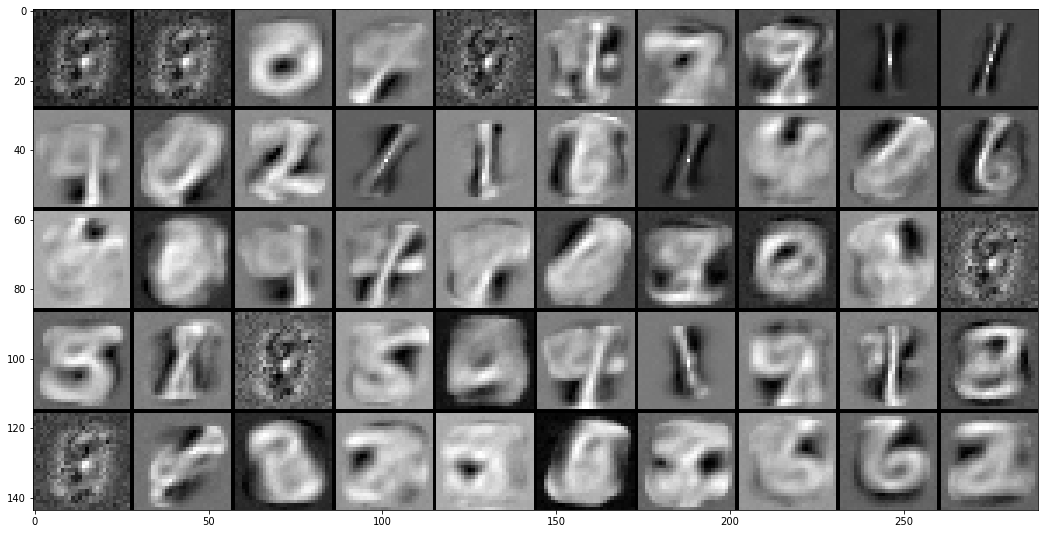

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=cur_w.T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray') 

In [ ]:
import numpy as np
x1 = np.random.rand(100000000,1)
x1*345678
a_file = open("test.txt","w")
for row in x1:
  np.savetxt(a_file,row)
a_file.close()

In [ ]:
import numpy as np
c1 = np.random.rand(100000000,1)*567
a_file = open("test.txt","w")
for row in c1:
  np.savetxt(a_file,row)
a_file.close()